<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Machine_Learning/blob/main/MaternalHealth_2348505.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv("/content/Maternal Health Risk Data Set.csv")

In [ ]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [6]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [8]:
data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [21]:
from scipy.stats import norm
import statistics
def curve(col):
  mean = statistics.mean(col)
  sd = statistics.stdev(col)
  plt.plot(col, norm.pdf(col, mean, sd))
  plt.show()

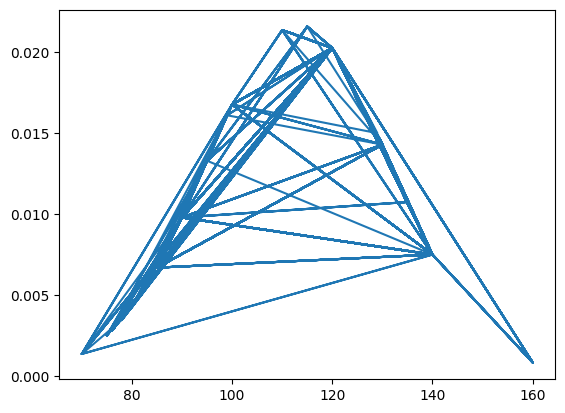

In [22]:
curve(data["SystolicBP"])

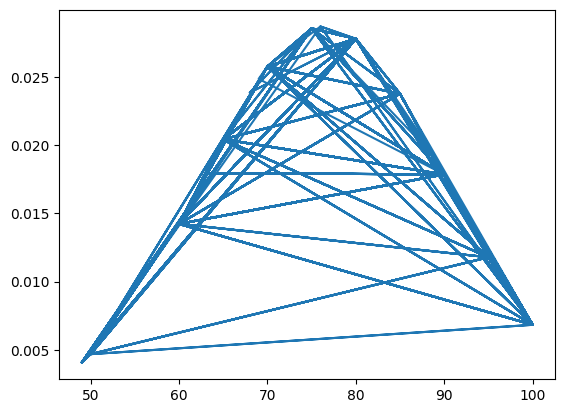

In [23]:
curve(data["DiastolicBP"])

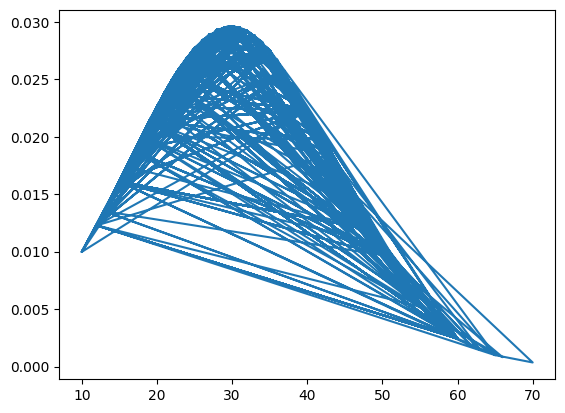

In [26]:
curve(data["Age"])

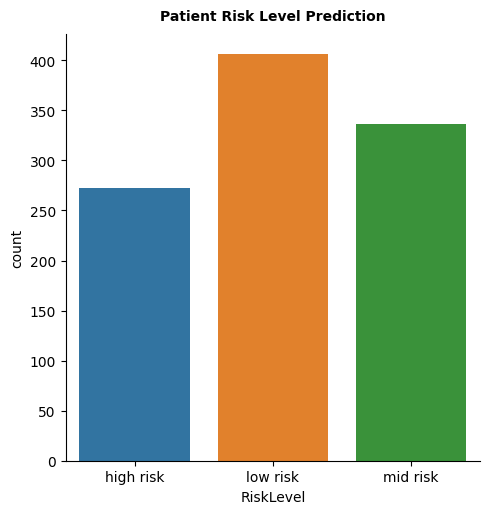

In [28]:
sns.catplot(x ="RiskLevel",kind ="count", data=data)
plt.title("Patient Risk Level Prediction",fontweight="black",size=10,pad=10)
plt.show()

In [32]:
bins = [0,20,40,60,80,100]
labels = ['0-20','20-40','40-60','60-80','80+']
data['AgeCat'] = pd.cut(data['Age'],bins, labels=labels)

In [30]:
def countplot(column):
    plt.figure(figsize=(10,5))
    ax = sns.countplot(x=column, data=data, hue="RiskLevel",palette="Set2")
    plt.title(f"RiskLevel by {column}",fontweight="black",size=20,pad=20)
    plt.show()

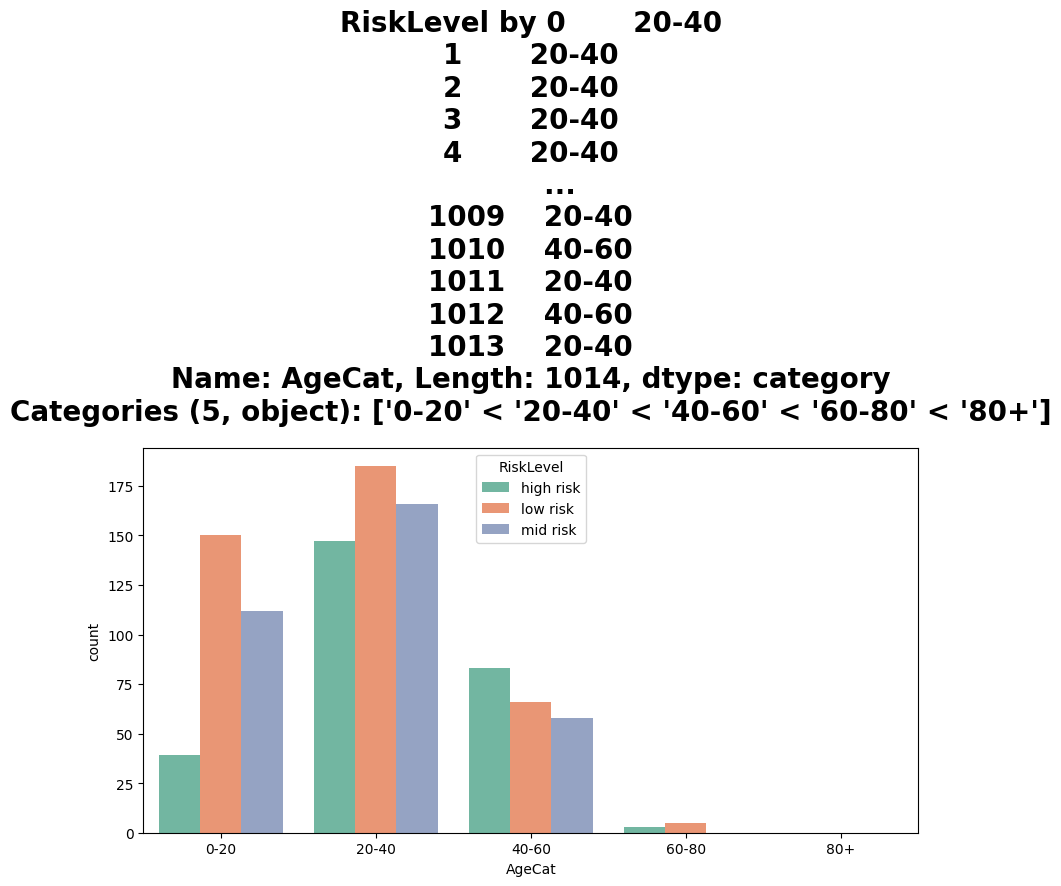

In [34]:
countplot(data["AgeCat"])

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SystolicBP'}>,
        <Axes: title={'center': 'DiastolicBP'}>],
       [<Axes: title={'center': 'BS'}>,
        <Axes: title={'center': 'BodyTemp'}>,
        <Axes: title={'center': 'HeartRate'}>],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

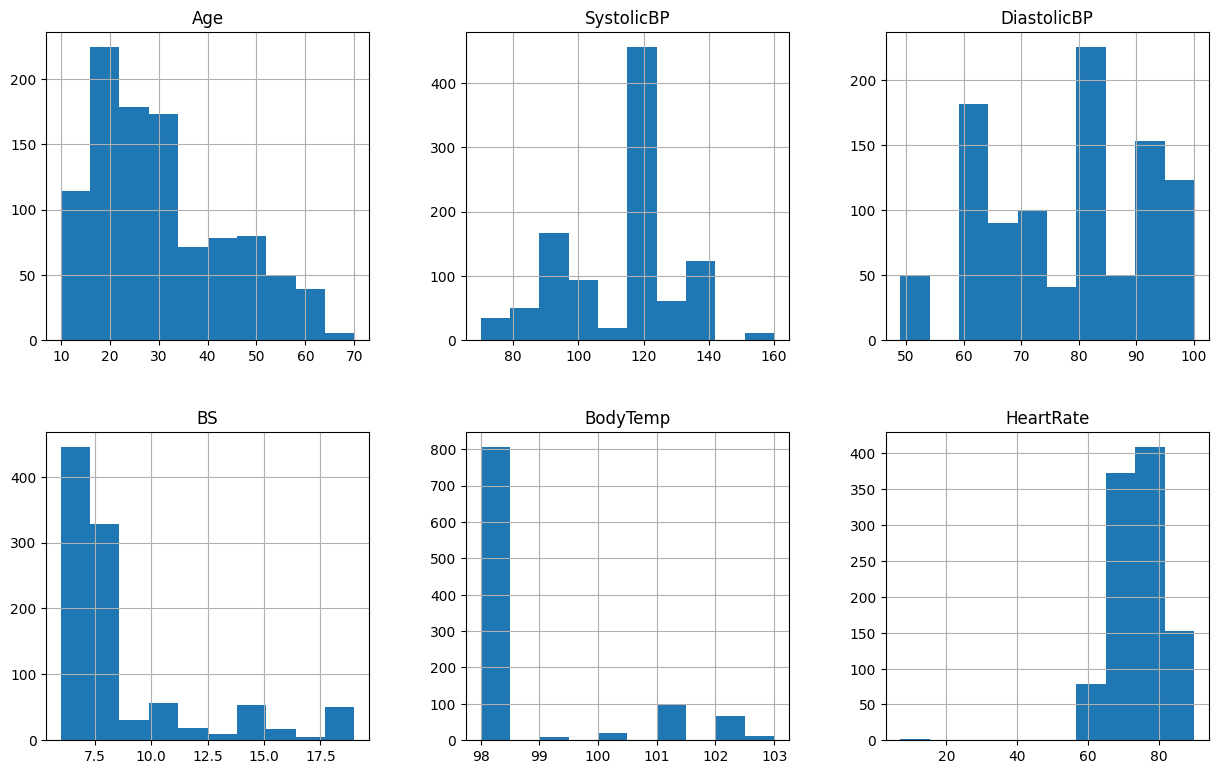

In [36]:
#Histogram of all the continuous data
data.hist(figsize=(15,30),layout=(6,3))

In [52]:
def continous_plot(col):
    data.boxplot(column = col,by= "RiskLevel")
    plt.title(f"Distribution of {col} by RiskLevel",fontweight="black",pad=20,size=15)
    plt.tight_layout()
    plt.show()

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          1014 non-null   int64   
 1   SystolicBP   1014 non-null   int64   
 2   DiastolicBP  1014 non-null   int64   
 3   BS           1014 non-null   float64 
 4   BodyTemp     1014 non-null   float64 
 5   HeartRate    1014 non-null   int64   
 6   RiskLevel    1014 non-null   object  
 7   AgeCat       1014 non-null   category
dtypes: category(1), float64(2), int64(4), object(1)
memory usage: 56.8+ KB


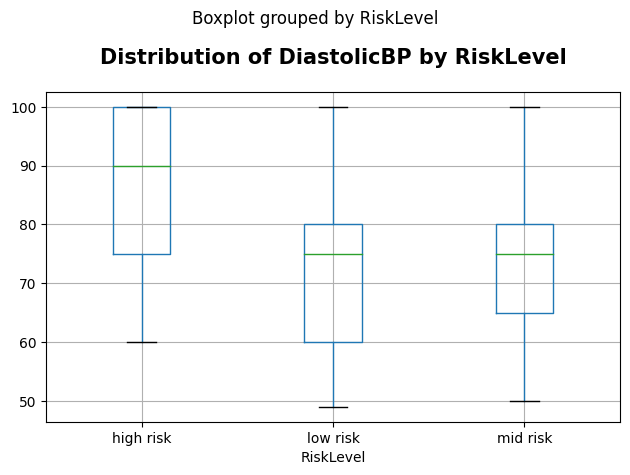

In [55]:
continous_plot("DiastolicBP")

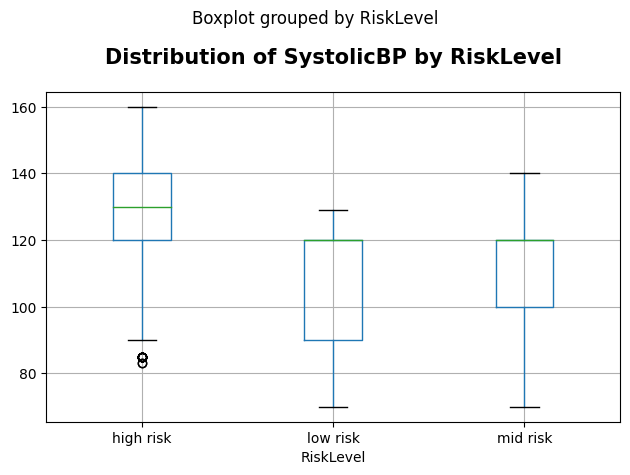

In [54]:
continous_plot("SystolicBP")

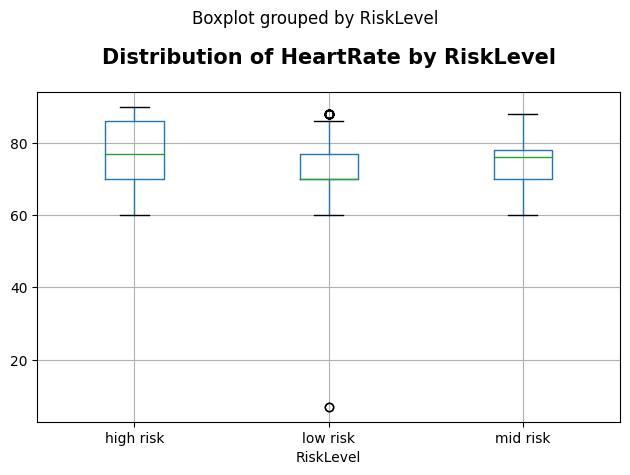

In [56]:
continous_plot("HeartRate")

In [59]:
df = data[["SystolicBP","DiastolicBP","HeartRate"]]

# apply normalization techniques
for column in df.columns:
    df[column] = df[column]  / df[column].abs().max()

# view normalized data
display(df)

<ipython-input-59-6a0594624760>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column]  / df[column].abs().max()


,SystolicBP,DiastolicBP,HeartRate
0,0.81250,0.80,0.955556
1,0.87500,0.90,0.777778
2,0.56250,0.70,0.888889
3,0.87500,0.85,0.777778
4,0.75000,0.60,0.844444
...,...,...,...
1009,0.75000,0.60,0.888889
1010,0.75000,0.90,0.666667
1011,0.53125,0.60,0.955556
1012,0.75000,0.90,0.777778


<Axes: >

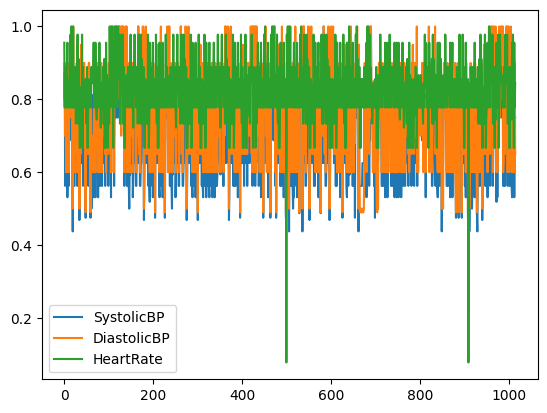

In [61]:
df.plot(kind = 'line')